# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [34]:
#  1. Get the total rides for each city type

cntrides=pyber_data_df.groupby(["type"]).count()["ride_id"]
cntrides

#typegrp=pyber_data_df.groupby("type").count()
#cnttrips_bytype=typegrp.count()
#cnttrips_bytype_test=cnttrips_bytype["ride_id"].copy()
#cnttrips_bytype_test.head()
#cnttrips_bytype=typegrp.count("type")
#cnttrips_bytype
#cntrides_df=typegrp.rename(columns={"ride_id": "cntride"}).drop(columns=["Name"]
#cntrides_df
#cntrides=typegrp["ride_id"]
#training_data["Membership Weeks"]=training_data["Membership (Days)"]/7

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [40]:
# 2. Get the total drivers for each city type
cntdrivers=city_data_df.groupby(["type"]).sum()["driver_count"]
cntdrivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [36]:
#  3. Get the total amount of fares for each city type
cntfares=pyber_data_df.groupby(["type"]).sum()["fare"]
cntfares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [76]:
#  4. Get the average fare per ride for each city type. 
 #calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
   
    
    # Calculate the percentage of rides for each city type.
ride_avgs = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_avgs=ride_avgs.rename("rideavg")
ride_avgs

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: rideavg, dtype: float64

In [89]:
# 5. Get the average fare per driver for each city type. 
driver_avgs = pyber_data_df.groupby(["type"]).sum()["fare"] / city_data_df.groupby(["type"]).sum()["driver_count"]
driver_avgs=driver_avgs.rename("driveravg")
driver_avgs

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
Name: driveravg, dtype: float64

In [104]:
#  6. Create a PyBer summary DataFrame. 

#pyber_summary_df=pd.DataFrame([ride_avgs,driver_avgs]) creates rows instead of columns
#pyber_summary_df['Total Rides','Total Drivers','Total Fares','Average Fare per Ride','Average Fare per Driver']=pd.concat([cntrides,cntdrivers,cntfares,ride_avgs,driver_avgs],axis=1)
pyber_summary_df=pd.concat([cntrides,cntdrivers,cntfares,ride_avgs,driver_avgs],axis=1)
pyber_summary_df=pyber_summary_df.rename(columns={"ride_id": "Total Rides","driver_count":"Total Drivers","fare":"Total Fares","rideavg":"Average Fare per Ride","driveravg":"Average Fare per Driver"})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [105]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [106]:
#  8. Format the columns.
pyber_summary_df["Average Fare per Ride"]=pyber_summary_df['Average Fare per Ride'].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df['Average Fare per Driver'].map("${:,.2f}".format)
pyber_summary_df["Total Fares"]=pyber_summary_df['Total Fares'].map("${:,.2f}".format)
pyber_summary_df["Total Rides"]=pyber_summary_df['Total Rides'].map("{:,}".format)
pyber_summary_df["Total Drivers"]=pyber_summary_df['Total Drivers'].map("{:,}".format)

In [107]:
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [108]:
# Print the merged DataFrame for reference.
print(pyber_summary_df)

         Total Rides Total Drivers Total Fares Average Fare per Ride  \
Rural            125            78   $4,327.93                $34.62   
Suburban         625           490  $19,356.33                $30.97   
Urban          1,625         2,405  $39,854.38                $24.53   

         Average Fare per Driver  
Rural                     $55.49  
Suburban                  $39.50  
Urban                     $16.57  


In [111]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

fare=pyber_data_df.groupby(["type","date"]).sum()["fare"]
df=pd.concat([fare],axis=1)
df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [113]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
#df = df.reset_index()
df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [116]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
#pivot_df=df.pivot(index='date', columns='type', values='fare')
pivot_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [117]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
df_new=pivot_df.loc['2019-01-01':'2019-04-28']
df_new.head()
#student_df.loc['2018-10-01':'2019-03-31']

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [118]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df_new.index = pd.to_datetime(df_new.index)

In [119]:
# 6. Check that the datatype for the index is datetime using df.info()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [121]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df_new2=df_new.resample('W').sum()
df_new2.head()
df=df_new2

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [133]:
df=df_new2
df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


<Figure size 30000x15000 with 0 Axes>

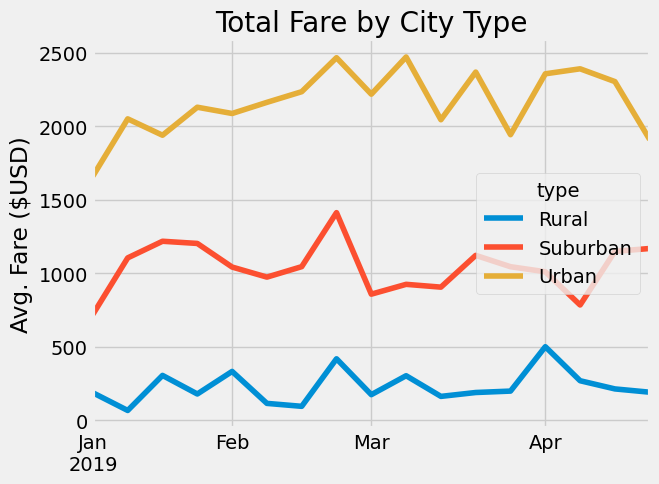

In [143]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


# Plot the data.
plt.figure(figsize=(300, 150))
plt.tight_layout()
df.plot()
plt.title("Total Fare by City Type")
plt.ylabel("Avg. Fare ($USD)")
plt.xlabel("")
plt.savefig("analysis/PyBer_fare_summary.png")

plt.show()

